# Learning Objectives

At the end of this class, you will be able to...

- Write down functions to compute mean, median and mode 

- Describe variance and what it reflects 

- Express the meaning of percentile

# An Introduction to Descriptive Statistics

- At this point in our course, we've had plenty of time, experience, and practice in manipulating our data. 

- However, to really _understand_ our data and underlying patterns across it, we need to dive a layer deeper into the mathematics behind data mechanics and dynamics.

- In order to be able to draw conclusions from our data, we need to be able to **describe and interpret our data**.

- This will become essential for more advanced data science concepts in data visualization, machine learning, and deep learning.

## Measures of Central Tendency

A [**Central Tendency**](https://en.wikipedia.org/wiki/Central_tendency) is a central (typical) value for a probability distribution

- In statistics, we often find that describing data by _averages_ allows us to more often make more powerful assertions regarding the data as a whole. 

- We often use **three key measures of central tendency** to help describe the **centroid** (arithmetic mean trend across a distribution) of our data:
    - **Mean**
    - **Median**
    - **Mode**

### The mean is the raw average value across our data. 

Calculating the mean is simple: _compute the sum of all values across our data and divide by the total number of values in our dataset_.

We've been using the mean for years and years, but such a surprisingly simple arithmetic calculation turns out to have massive implications across being able to critically understand and break down complex datasets! 


### Activity: _Write a function to compute the mean from an arbitrary dataset._

In [1]:
import numpy as np

data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])


def compute_mean(dataset):
  """ Main function that calculates the average value across our data. """
  sum = 0
  for number in data:
    sum += number

  return sum / data.size
    


compute_mean(data)
# data.mean()

4.391304347826087

## Activity (Titanic):

- What is the average age of male passengers that survived?

Once you've found the average, talk with a neighbor who has also found the average, and compare how you each came about to your solution

In [2]:
import pandas as pd
titanicdf = pd.read_csv("datasets/titanic.csv")
titanicdf.dropna(inplace=True)

titanicdf[titanicdf["Sex"] == "male"]["Age"].mean()

38.45178947368421

In [3]:
titanicdf[(titanicdf["Survived"] == 1) & (titanicdf["Age"] > 20)]["Fare"].mean()

85.34500299999998

### The median is the "middle value" or midpoint across our data.

Determining the median is as simple as it sounds: _find the data value lying in the exact middle of our dataset_.

One critical exception occurs when our data has an even number of values and thus has **two values** at its center: _in these cases, find the **mean** value of the two medians to obtain the true median across our data_. 

**Remember:** the median can only be calculated across _sorted data_!

If data is distributed in a non-normal manner, then we can learn a great deal from interpreting what the exact median value of our dataset is. 

### Activity: _Write a function to compute the median from an arbitrary dataset._

Once you write the function, compare with a neighbor's implementation

In [4]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the exact true median value of our dataset.
# HINT: Consider using DataFrame slicing to help with identifying the correct median value(s).
def compute_median(dataset):
    """ Main function that determines the median value across our data. """
    count = len(dataset)
    middle = count // 2
    dataset = np.sort(dataset)

    if count < 1:
      return 0
    if count % 2 == 1:
      return dataset[middle]
    else:
      return (dataset[middle - 1] + dataset[middle]) / 2
    
compute_median(data)
np.median(data)

4.0

### The mode is the most commonly occurring value or feature across our data.

Determining the mode is relatively simple: _find the value that occurs most frequently across our data_.

Remember that if all values across our data are unique and only occur once, then our data **has no mode**!

The mode is also an interesting measure of _central tendency_ in that it can be applied towards categorical (non-numerical) data; one can find frequently occurring categories without running any calculations. 

### Activity: _Write a function to compute the mode from an arbitrary dataset._

Once you write the function, compare with a neighbor's implementation

In [5]:
# NOTE: Tricker than it looks!
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the relative mode across our dataset.
# HINT: Remember histograms and tokenization from CS 1.2? How many they help you here? 
def compute_mode(dataset):
    """ Main function that determines the mode value across our data. """
    return

compute_mode(data)

There we have it!

Three measures of central tendency that are critically important to understanding the distribution of our data. 

In future classes on distributions and introductory inferential statistics, we'll talk more about exactly **why** these measures are so important. 

## Measures of Spread and Variance

Like our friends in the central tendency community, measures of spread and variance do their best to describe patterns across our data as a whole.

However, unlike measures of central tendency, which focus on the distribution of our data towards an arithmetic centroid, measures of spread and variance talk about the shape and layout of our data all across the board!

In this course, there are **two key measures of spread and variance** to help describe the shape of our data:
- **Range**
- **Variance**, **Standard Deviation**


## What is Range?

**Range** is the difference between the highest and lowest values in a data set. It is one of the simplest measures of **spread** (the extent to which a distribution is stretched or squeezed). We'll use variance/standard deviation to help give more information around all of this!

## What is standard deviation or variance?

Let's learn it by example:
    
- We measured the number of rainy days during Fall in three different cities in the last 5 years:

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({'Rainy':[29,28,32,35,36,12,18,30,45,55, 32,32,32,32,32], 'City':['City_A']*5 + ['City_B']*5 + ['City_C']*5})
df

,Rainy,City
0,29,City_A
1,28,City_A
2,32,City_A
3,35,City_A
4,36,City_A
5,12,City_B
6,18,City_B
7,30,City_B
8,45,City_B
9,55,City_B


## What is the mean of rainy days for City A, B and C?

In [7]:
print(np.mean(df[df['City'] == 'City_A']['Rainy']))

print(np.mean(df[df['City'] == 'City_B']['Rainy']))

print(np.mean(df[df['City'] == 'City_C']['Rainy']))

32.0
32.0
32.0


## Which city has more variation?

**Standard deviation (std), which is the square root of variance,** can capture the variations in different arrays

[Docs on the std function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) from Numpy

In [8]:
print(np.std(df[df['City'] == 'City_A']['Rainy']))

print(np.std(df[df['City'] == 'City_B']['Rainy']))

print(np.std(df[df['City'] == 'City_C']['Rainy']))

3.1622776601683795
16.112107248898266
0.0


## Let's plot the variations in the data

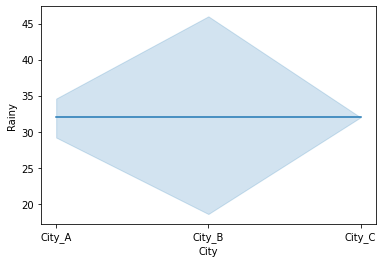

In [9]:
sns.lineplot(y='Rainy', x='City', data=df)
plt.show()

## Most (or majority) of the values (rainy days) in Cities A, B and C are between mean - std and mean + std

In [10]:

print([32 - np.std(df[df['City'] == 'City_A']['Rainy']), 32 + np.std(df[df['City'] == 'City_A']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_B']['Rainy']), 32 + np.std(df[df['City'] == 'City_B']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_C']['Rainy']), 32 + np.std(df[df['City'] == 'City_C']['Rainy'])])


[28.837722339831622, 35.16227766016838]
[15.887892751101734, 48.11210724889827]
[32.0, 32.0]


# Percentile

The value below which a percentage of data falls.

## Activity - Compute 75% Percentile for Fare in Titanic
We want to compute:

- What fare value did 75% of all the fare values fall below

How would we do this?

**Hint:** Use Numpy's [percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) function

When you're done, compare implementations with a neighbor

In [11]:
df = pd.read_csv("datasets/titanic.csv")
df
np.percentile(df['Fare'], 75)

31.0

## Verify that 75 percent of passengers paid less than 31.0 Dollar

In [12]:
# Slice the data based on Fare for those paid less than 31 Dollar
numbers_below_percentile = df[df['Fare'] <= np.percentile(df["Fare"], 75)]

# Compute the size of the sliced dataframe and divide over all number of passengers
pr_below_percentile = len(numbers_below_percentile)/len(df["Fare"])

pr_below_percentile

0.7508417508417509